### Exploratory Data Analysis
### Data Pre-Processing

In [2]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd

df_matches = pd.read_csv("matches.csv")
df_matches.head(2)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN


In [92]:
df_deliveries = pd.read_csv("deliveries.csv")
df_deliveries.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN


In [ ]:
print(df_matches.shape)
print(df_deliveries.shape)

(756, 18)
(179078, 21)






*   In matches data frame columns like umpire1,umpire2,umpire3 are not useful because these days they are using technology. So we cant decide which umpire is more useful for predicting anything related to match.
*   Date is also not useful because we already have season column which is also almost equal to date.


*   City and venue also not important features for this year IPL. Because IPL2020 is happening in UAE, only 2014 ipl was happened in UAE that to half season. But i am removing only venue it almost equal to city feature.
*   'Result' feature is almost equal to 'winner' feature. So i am dropping result column also.










In [4]:
df_matches = df_matches.drop(['venue','date','result','umpire1','umpire2','umpire3'], axis = 1) 
df_matches.head(2)

,id,season,city,team1,team2,toss_winner,toss_decision,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match
0,1,2017,Hyderabad,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,Sunrisers Hyderabad,35,0,Yuvraj Singh
1,2,2017,Pune,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,0,Rising Pune Supergiant,0,7,SPD Smith


In [5]:
print(df_matches["team1"].value_counts())

Mumbai Indians                 101
Kings XI Punjab                 91
Chennai Super Kings             89
Royal Challengers Bangalore     85
Kolkata Knight Riders           83
Delhi Daredevils                72
Rajasthan Royals                67
Sunrisers Hyderabad             63
Deccan Chargers                 43
Pune Warriors                   20
Gujarat Lions                   14
Rising Pune Supergiant           8
Rising Pune Supergiants          7
Kochi Tuskers Kerala             7
Delhi Capitals                   6
Name: team1, dtype: int64


In [93]:
#In 2019 delhi daredevils name changed to delhi capitals. So i am replacing old name with new name for all the rows.
df_matches = df_matches.replace(to_replace ="Delhi Daredevils", value = "Delhi Capitals") 

df_deliveries = df_deliveries.replace(to_replace = "Delhi Daredevils", value = "Delhi Capitals")

#Rising pune supergiants name also printed in two ways. Lets change it to Rising pune supergiants.
df_matches = df_matches.replace(to_replace ="Rising Pune Supergiant", value = "Rising Pune Supergiants") 

df_deliveries = df_deliveries.replace(to_replace = "Rising Pune Supergiant", value = "Rising Pune Supergiants")

In [7]:
#checking null values in matches dataset
print(df_matches.isnull().sum())

id                 0
season             0
city               7
team1              0
team2              0
toss_winner        0
toss_decision      0
dl_applied         0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
dtype: int64


In [ ]:
#printing null rows in matches dataset
df1_null = df_matches[df_matches.isna().any(axis=1)]
df1_null.head(2)

,id,season,city,team1,team2,toss_winner,toss_decision,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match
300,301,2011,Delhi,Delhi Capitals,Pune Warriors,Delhi Capitals,bat,0,NaN,0,0,NaN
461,462,2014,NaN,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,0,Royal Challengers Bangalore,0,7,PA Patel


In [9]:
#After seeing above table we can clearly understood that 4 matches are not played beacuse of rain, badlight or pitch condition. 
#So i am replacing those null values in winner column with no result and palyer of the match column null values with not declared.
df_matches["winner"].fillna("No result", inplace = True)
df_matches['player_of_match'].fillna("Not declared", inplace = True)
#city column also has 7 null values. I checked those matches data in Espn website and they played in Dubai.
df_matches["city"].fillna("Dubai", inplace = True)
print(df_matches.shape)

(756, 12)


In [ ]:
#checking null values in deliveries dataset
print(df_deliveries.isnull().sum())

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64




*   Player_dismissed, dismissal_kind and fielder features are having null values. But if you consider today questions only 'player_dismissed' and 'dismissal_kind' features are useful for today analysis. So i am removing "fielder" feature.
*   Filling player_dismissed null values with 'No wicket', dismissal_Kind null values with also No Wicket



In [94]:
#dropping fielder column
df_deliveries = df_deliveries.drop(['fielder'], axis = 1) 
#filling null values
df_deliveries["player_dismissed"].fillna("No Wicket", inplace = True)
df_deliveries["dismissal_kind"].fillna("No Wicket", inplace = True)
df_deliveries.head(2)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,No Wicket,No Wicket
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,0,0,0,0,0,0,0,0,No Wicket,No Wicket


In [ ]:
# list of dtypes to include 
include =['float', 'int']
desc = df_deliveries.describe(include = include)
desc

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000,179078.000000
mean,1802.252957,1.482952,10.162488,3.615587,0.000452,0.036721,0.004936,0.021136,0.004183,0.000056,1.246864,0.067032,1.313897
std,3472.322805,0.502074,5.677684,1.806966,0.021263,0.251161,0.116480,0.194908,0.070492,0.016709,1.608270,0.342553,1.605422
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,190.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,379.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,567.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,11415.000000,5.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,7.000000,7.000000,10.000000




*   I think there are no outliers present in overs column but in balls column balls range is between(0-9), it happens if bowlers balls extra deliveries.
*   In innings column maximum value is 5 so there are some outliers presented. Because there are 2 innings per match, if match tied then they will conduct one super over till last season. So maximum number of innings is 4.

*   And in remaining columns max value is in certain limit only. So i can say there are not much outliers.






### Q1) Who will win today match MI VS RR?

In [21]:
# Lets check winning ratio between MI VS RR
df_MI_CSK = df_matches[((df_matches['team1'] == 'Mumbai Indians') | (df_matches['team1'] == 'Rajasthan Royals')) & 
                         ((df_matches['team2'] == 'Mumbai Indians') | (df_matches['team2'] == 'Rajasthan Royals'))] 

#plotting MI and RR wins against each other
import plotly.graph_objs as go
df_winner = df_MI_CSK[['id','winner']].groupby('winner').size().reset_index()
df_winner.columns = ['winner','total_wins']
df_winner = df_winner.sort_values('total_wins',ascending=False)

data = go.Bar(x = df_winner['winner'],y = df_winner['total_wins'])
layout = go.Layout(title = 'Number of wins by MI and RR against each other',xaxis = dict(title = 'Team'),yaxis = dict(title = 'No of wins'))
fig = go.Figure(data = data,layout = layout)
fig.show()

They played 20 head-head matches. RR won 10 and MI won 10 matches. 

In [25]:
#Lets look at how many player of the match awards won by current MI and RR players.
#Note: I am taking top 7 palyers from both teams not tking rohit because he is not played in last match. I think this match also he will take rest.
#Sometimes team win dependent on Number of match winners in your team. i.e why i am using this approach.
#Note: I am taking these player names because these players are played atleast one match for their respective sides in this season till now.
df_man_of_match_MI = df_matches[(df_matches['player_of_match'] == 'AS Yadav') | (df_matches['player_of_match'] == 'Q de Kock') |
                                (df_matches['player_of_match'] == 'HH Pandya') | (df_matches['player_of_match'] == 'KA Pollard	') |
                                (df_matches['player_of_match'] == 'JJ Bumrah') | (df_matches['player_of_match'] == 'TA Boult') |
                                (df_matches['player_of_match'] == 'RD Chahar') ]


print("Total number of man of matches won by present Mumbai players is", df_man_of_match_MI.shape[0],"\n") 

df_man_of_match_RR = df_matches[(df_matches['player_of_match'] == 'SV Samson') | (df_matches['player_of_match'] == 'BA Stokes') |
                                (df_matches['player_of_match'] == 'RV Uthappa') | (df_matches['player_of_match'] == 'JC Buttler') |
                                (df_matches['player_of_match'] == 'SPD Smith') | (df_matches['player_of_match'] == 'S Gopal') |
                                (df_matches['player_of_match'] == 'J Archer') ] 


print("Total number of man of matches won by present Rajasthan players is", df_man_of_match_RR.shape[0])                                                               

Total number of man of matches won by present Mumbai players is 15 

Total number of man of matches won by present Rajasthan players is 28


**Conclusion :-**

RR players won more man of the match awards than MI. That means RR has more match winners.

So i am predicting RR will win today match.

### Q2) Calculate which player has highest Batsman intimidation score(BIS) in today match?

I am calculating players average BIS by combining all IPL matches

In [40]:
#------------------------------- decock ----------------------------

df_decock= df_deliveries[(df_deliveries['batsman'] == 'Q de Kock') & (df_deliveries['wide_runs'] == 0)]
df_1s2s3s_decock = df_decock[(df_decock['batsman_runs'] == 1) | (df_decock['batsman_runs'] == 2) |(df_decock['batsman_runs'] == 3)]
df_boundaries_decock = df_decock[(df_decock['batsman_runs'] == 4) | (df_decock['batsman_runs'] == 6)]
df_noballs = df_decock[df_decock['noball_runs'] > 0]

no_of_runs = df_decock['batsman_runs'].sum()
no_of_boundary_runs = df_boundaries_decock['batsman_runs'].sum()
no_of_1s2s3s_runs = df_1s2s3s_decock['batsman_runs'].sum()
#Claculating number of balls faced by batsman and excluding no-balls. Anyway we excluded wideballs in first step only.
no_of_balls_faced = (df_decock.shape[0]) - (df_noballs.shape[0])

BIS_decock = (no_of_runs + no_of_boundary_runs - (no_of_1s2s3s_runs*0.5))/(no_of_balls_faced)

#------------------------------- SteveSmith ----------------------------

df_smith= df_deliveries[(df_deliveries['batsman'] == 'SPD Smith') & (df_deliveries['wide_runs'] == 0)]
df_1s2s3s_smith = df_smith[(df_smith['batsman_runs'] == 1) | (df_smith['batsman_runs'] == 2) |(df_smith['batsman_runs'] == 3)]
df_boundaries_smith = df_smith[(df_smith['batsman_runs'] == 4) | (df_smith['batsman_runs'] == 6)]
df_noballs = df_smith[df_smith['noball_runs'] > 0]

no_of_runs = df_smith['batsman_runs'].sum()
no_of_boundary_runs = df_boundaries_smith['batsman_runs'].sum()
no_of_1s2s3s_runs = df_1s2s3s_smith['batsman_runs'].sum()
#Claculating number of balls faced by batsman and excluding no-balls. Anyway we excluded wideballs in first step only.
no_of_balls_faced = (df_smith.shape[0]) - (df_noballs.shape[0])

BIS_smith = (no_of_runs + no_of_boundary_runs - (no_of_1s2s3s_runs*0.5))/(no_of_balls_faced)


In [42]:
#------------------------------- Pollard ----------------------------

df_pollard= df_deliveries[(df_deliveries['batsman'] == 'KA Pollard') & (df_deliveries['wide_runs'] == 0)]
df_1s2s3s_pollard = df_pollard[(df_pollard['batsman_runs'] == 1) | (df_pollard['batsman_runs'] == 2) |(df_pollard['batsman_runs'] == 3)]
df_boundaries_pollard = df_pollard[(df_pollard['batsman_runs'] == 4) | (df_pollard['batsman_runs'] == 6)]
df_noballs = df_pollard[df_pollard['noball_runs'] > 0]

no_of_runs = df_pollard['batsman_runs'].sum()
no_of_boundary_runs = df_boundaries_pollard['batsman_runs'].sum()
no_of_1s2s3s_runs = df_1s2s3s_pollard['batsman_runs'].sum()
#Claculating number of balls faced by batsman and excluding no-balls. Anyway we excluded wideballs in first step only.
no_of_balls_faced = (df_pollard.shape[0]) - (df_noballs.shape[0])

BIS_pollard = (no_of_runs + no_of_boundary_runs - (no_of_1s2s3s_runs*0.5))/(no_of_balls_faced)

#------------------------------- Ishan Kishan ----------------------------

df_ishan= df_deliveries[(df_deliveries['batsman'] == 'Ishan Kishan') & (df_deliveries['wide_runs'] == 0)]
df_1s2s3s_ishan = df_ishan[(df_ishan['batsman_runs'] == 1) | (df_ishan['batsman_runs'] == 2) |(df_ishan['batsman_runs'] == 3)]
df_boundaries_ishan = df_ishan[(df_ishan['batsman_runs'] == 4) | (df_ishan['batsman_runs'] == 6)]
df_noballs = df_ishan[df_ishan['noball_runs'] > 0]

no_of_runs = df_ishan['batsman_runs'].sum()
no_of_boundary_runs = df_boundaries_ishan['batsman_runs'].sum()
no_of_1s2s3s_runs = df_1s2s3s_ishan['batsman_runs'].sum()
#Claculating number of balls faced by batsman and excluding no-balls. Anyway we excluded wideballs in first step only.
no_of_balls_faced = (df_ishan.shape[0]) - (df_noballs.shape[0])

BIS_ishan = (no_of_runs + no_of_boundary_runs - (no_of_1s2s3s_runs*0.5))/(no_of_balls_faced)


In [44]:
#------------------------------- Samson----------------------------

df_samson= df_deliveries[(df_deliveries['batsman'] == 'Q de Kock') & (df_deliveries['wide_runs'] == 0)]
df_1s2s3s_samson = df_samson[(df_samson['batsman_runs'] == 1) | (df_samson['batsman_runs'] == 2) |(df_samson['batsman_runs'] == 3)]
df_boundaries_samson = df_samson[(df_samson['batsman_runs'] == 4) | (df_samson['batsman_runs'] == 6)]
df_noballs = df_samson[df_samson['noball_runs'] > 0]

no_of_runs = df_samson['batsman_runs'].sum()
no_of_boundary_runs = df_boundaries_samson['batsman_runs'].sum()
no_of_1s2s3s_runs = df_1s2s3s_samson['batsman_runs'].sum()
#Claculating number of balls faced by batsman and excluding no-balls. Anyway we excluded wideballs in first step only.
no_of_balls_faced = (df_samson.shape[0]) - (df_noballs.shape[0])

BIS_samson = (no_of_runs + no_of_boundary_runs - (no_of_1s2s3s_runs*0.5))/(no_of_balls_faced)

#------------------------------- Hardik Pandya ----------------------------

df_HP= df_deliveries[(df_deliveries['batsman'] == 'HH Pandya') & (df_deliveries['wide_runs'] == 0)]
df_1s2s3s_HP = df_HP[(df_HP['batsman_runs'] == 1) | (df_HP['batsman_runs'] == 2) |(df_HP['batsman_runs'] == 3)]
df_boundaries_HP = df_HP[(df_HP['batsman_runs'] == 4) | (df_HP['batsman_runs'] == 6)]
df_noballs = df_HP[df_HP['noball_runs'] > 0]

no_of_runs = df_HP['batsman_runs'].sum()
no_of_boundary_runs = df_boundaries_HP['batsman_runs'].sum()
no_of_1s2s3s_runs = df_1s2s3s_HP['batsman_runs'].sum()
#Claculating number of balls faced by batsman and excluding no-balls. Anyway we excluded wideballs in first step only.
no_of_balls_faced = (df_HP.shape[0]) - (df_noballs.shape[0])

BIS_HP = (no_of_runs + no_of_boundary_runs - (no_of_1s2s3s_runs*0.5))/(no_of_balls_faced)


In [46]:
#------------------------------- Buttler ----------------------------

df_buttler= df_deliveries[(df_deliveries['batsman'] == 'Q de Kock') & (df_deliveries['wide_runs'] == 0)]
df_1s2s3s_buttler = df_buttler[(df_buttler['batsman_runs'] == 1) | (df_buttler['batsman_runs'] == 2) |(df_buttler['batsman_runs'] == 3)]
df_boundaries_buttler = df_buttler[(df_buttler['batsman_runs'] == 4) | (df_buttler['batsman_runs'] == 6)]
df_noballs = df_buttler[df_buttler['noball_runs'] > 0]

no_of_runs = df_buttler['batsman_runs'].sum()
no_of_boundary_runs = df_boundaries_buttler['batsman_runs'].sum()
no_of_1s2s3s_runs = df_1s2s3s_buttler['batsman_runs'].sum()
#Claculating number of balls faced by batsman and excluding no-balls. Anyway we excluded wideballs in first step only.
no_of_balls_faced = (df_buttler.shape[0]) - (df_noballs.shape[0])

BIS_buttler = (no_of_runs + no_of_boundary_runs - (no_of_1s2s3s_runs*0.5))/(no_of_balls_faced)

#------------------------------- Krunal Pandya ----------------------------

df_KP= df_deliveries[(df_deliveries['batsman'] == 'KH Pandya') & (df_deliveries['wide_runs'] == 0)]
df_1s2s3s_KP = df_KP[(df_KP['batsman_runs'] == 1) | (df_KP['batsman_runs'] == 2) |(df_KP['batsman_runs'] == 3)]
df_boundaries_KP = df_KP[(df_KP['batsman_runs'] == 4) | (df_KP['batsman_runs'] == 6)]
df_noballs = df_KP[df_KP['noball_runs'] > 0]

no_of_runs = df_KP['batsman_runs'].sum()
no_of_boundary_runs = df_boundaries_KP['batsman_runs'].sum()
no_of_1s2s3s_runs = df_1s2s3s_KP['batsman_runs'].sum()
#Claculating number of balls faced by batsman and excluding no-balls. Anyway we excluded wideballs in first step only.
no_of_balls_faced = (df_KP.shape[0]) - (df_noballs.shape[0])

BIS_KP = (no_of_runs + no_of_boundary_runs - (no_of_1s2s3s_runs*0.5))/(no_of_balls_faced)


In [47]:
print("Decock BIS Score :", BIS_decock)
print("Smith BIS Score  :", BIS_smith)
print("Pollard BIS Score:", BIS_pollard)
print("Ishan BIS Score  :", BIS_ishan)
print("Samson BIS Score :", BIS_samson)
print("Hardik BIS Score :", BIS_HP)
print("Buttler BIS Score:", BIS_buttler)
print("Krunal BIS Score :", BIS_KP)


Decock BIS Score : 1.9530685920577617
Smith BIS Score  : 1.6310057655349135
Pollard BIS Score: 2.1736222578919207
Ishan BIS Score  : 1.9745283018867925
Samson BIS Score : 1.9530685920577617
Hardik BIS Score : 2.332122093023256
Buttler BIS Score: 1.9530685920577617
Krunal BIS Score : 2.1081967213114754


**Cocnclusion :-**

According to above analysis Hardik pandya has highest BIS. So i am predicting in today match also hardik will have highest BIS.

### Q3) Which individual batsman in the match will have the best(number of runs scored off boundaries) : (total runs scored) ratio?

I am calculating ratio for all batsman who are played in last match for their respective sides. Rohit is not not played in last match for MI. This question is about players, So most of the players will change team every two years. i.e why i am considering all the matches they played not only MI VS RR matches.

In [11]:
#Taking 5 batsman from each team(Not including rohit)
df_batsmans_MIRR = df_deliveries[(df_deliveries['batsman'] == 'Q de Kock') | (df_deliveries['batsman'] == 'KA Pollard') |
                                 (df_deliveries['batsman'] == 'HH Pandya') | (df_deliveries['batsman'] == 'Ishan Kishan') |
                                 (df_deliveries['batsman'] == 'KH Pandya') | (df_deliveries['batsman'] == 'SPD Smith') |
                                 (df_deliveries['batsman'] == 'SV Samson') | (df_deliveries['batsman'] == 'BA Stokes') |
                                 (df_deliveries['batsman'] == 'RV Uthappa') | (df_deliveries['batsman'] == 'JC Buttler')]

#First calcualting total runs scored by every batsman in all matches 
total_runs = df_batsmans_MIRR.groupby('batsman')['batsman_runs'].sum()
df_total_runs = total_runs.to_frame().reset_index()
df_total_runs.rename(columns = {'batsman_runs':'total_runs'}, inplace = True) 
df_total_runs.head(10)


,batsman,total_runs
0,BA Stokes,647
1,HH Pandya,1118
2,Ishan Kishan,711
3,JC Buttler,1431
4,KA Pollard,2784
5,KH Pandya,915
6,Q de Kock,1489
7,RV Uthappa,4446
8,SPD Smith,2047
9,SV Samson,2235


In [12]:
#Now taking only 4's and 6's rows from above dataframe
#I saw in dataset some rows showing batsman runs = 5 or 7 but we dont know weather these runs are coming from boundaries or not.
#So i am considering those rows as outliers and taking only 4 and 6.

df_4s6s = df_batsmans_MIRR[(df_batsmans_MIRR['batsman_runs'] == 4) | (df_batsmans_MIRR['batsman_runs'] == 6)]
df_4s6s.head(2)
boundaries_runs = df_4s6s.groupby('batsman')['batsman_runs'].sum()
df_boundaries_runs = boundaries_runs.to_frame().reset_index()
df_boundaries_runs.rename(columns = {'batsman_runs':'boundaries_runs'}, inplace = True) 
df_boundaries_runs.head(10)

,batsman,boundaries_runs
0,BA Stokes,322
1,HH Pandya,706
2,Ishan Kishan,468
3,JC Buttler,938
4,KA Pollard,1778
5,KH Pandya,558
6,Q de Kock,948
7,RV Uthappa,2680
8,SPD Smith,1018
9,SV Samson,1218


In [13]:
#Now first merging above dataframes then calculating ratio for each batsman
df_ratio = pd.merge(df_boundaries_runs, df_total_runs, left_on='batsman',right_on='batsman', how='outer')

df_ratio['ratio'] = df_ratio['boundaries_runs'] / df_ratio['total_runs']
df_ratio.head(10)

,batsman,boundaries_runs,total_runs,ratio
0,BA Stokes,322,647,0.497682
1,HH Pandya,706,1118,0.631485
2,Ishan Kishan,468,711,0.658228
3,JC Buttler,938,1431,0.655486
4,KA Pollard,1778,2784,0.638649
5,KH Pandya,558,915,0.609836
6,Q de Kock,948,1489,0.636669
7,RV Uthappa,2680,4446,0.602789
8,SPD Smith,1018,2047,0.497313
9,SV Samson,1218,2235,0.544966




1.   If you look at ratio column Pandya brothers,kishan,buttler,pollard,uthappa and decock has ratio > 0.6 of(boundary runs : total runs) in ipl.
2.   So in given options Krunal pandya,hardik pandya, Jos buttler and Uthappa is not there from above mentioned list of 6 players who has ratio > 0.6.

So i am choosing 'others' option in given options.



### Q4) How many balls more/less will RR take to reach a team total 100 as compared to MI?

In [14]:
#First i am taking Mumbai vs RR matches.
#Than calculating Number of balls take to reach 100 runs in each match by both teams.
#Now i am filtering MI batting against RR.
df_MIbatting = df_deliveries[(df_deliveries['batting_team'] == 'Mumbai Indians') & (df_deliveries['bowling_team'] == 'Rajasthan Royals')]
                          
#converting total_runs,match id and wide_runs into list
total_runs_list = df_MIbatting['total_runs'].tolist()
match_id_list = df_MIbatting['match_id'].tolist()
wideballs_list = df_MIbatting['wide_runs'].tolist()
noballs_list = df_MIbatting['noball_runs'].tolist()

listoflists = []
listoflists.append(match_id_list)
listoflists.append(total_runs_list)
listoflists.append(wideballs_list)
listoflists.append(noballs_list)

MI_ballsfaced = []
MI_matchID = []
run = 0
balls_faced = 0
for i in range(len(listoflists[0])-1):
     run = run + (listoflists[1][i])
     if listoflists[2][i] == 0 and listoflists[3][i] == 0 : #only including valid deliveries in balls faced not wides, no-balls
        balls_faced = balls_faced + 1
     if listoflists[0][i] != listoflists[0][i+1] and listoflists[0][i] not in MI_matchID and run<100:
        MI_ballsfaced.append('NA')  #here 'NA' means mumbai didnt scored 100 runs in a match.
        MI_matchID.append(listoflists[0][i])
        balls_faced = 0
        run = 0
     if listoflists[0][i] != listoflists[0][i+1]:
        balls_faced = 0
        run = 0 
     if listoflists[0][i] not in MI_matchID:   
        if run >= 100:
           MI_ballsfaced.append(balls_faced)
           MI_matchID.append(listoflists[0][i])
           run = 0
           balls_faced = 0

print("Balls faced to reach 100 runs by MI:",MI_ballsfaced)
print("Corresponding Match_Id             :",MI_matchID)

Balls faced to reach 100 runs by MI: [87, 94, 90, 60, 81, 'NA', 97, 74, 68, 'NA', 70, 72, 74, 52, 97, 79, 63, 72, 68, 70]
Corresponding Match_Id             : [86, 113, 160, 176, 219, 267, 299, 319, 377, 403, 447, 456, 501, 513, 526, 549, 7914, 7940, 11318, 11327]


In [15]:
#Now i am filtering RR batting against MI
df_RRbatting = df_deliveries[(df_deliveries['batting_team'] == 'Rajasthan Royals') & (df_deliveries['bowling_team'] == 'Mumbai Indians')]

#converting total_runs,match id and wide_runs into list
total_runs_list = df_RRbatting['total_runs'].tolist()
match_id_list = df_RRbatting['match_id'].tolist()
wideballs_list = df_RRbatting['wide_runs'].tolist()
noballs_list = df_RRbatting['noball_runs'].tolist()

listoflists = []
listoflists.append(match_id_list)
listoflists.append(total_runs_list)
listoflists.append(wideballs_list)
listoflists.append(noballs_list)

RR_ballsfaced = []
RR_matchID = []
run = 0
balls_faced = 0
for i in range(len(listoflists[0])-1):
     run = run + (listoflists[1][i])
     if listoflists[2][i] == 0 and listoflists[3][i] == 0 : #only including valid deliveries in balls faced not wides, no-balls
        balls_faced = balls_faced + 1
     if listoflists[0][i] != listoflists[0][i+1] and listoflists[0][i] not in RR_matchID and run<100:
        RR_ballsfaced.append('NA')  #here NA means mumbai didnt scored 100 runs in a match.
        RR_matchID.append(listoflists[0][i])
        balls_faced = 0
        run = 0
     if listoflists[0][i] != listoflists[0][i+1]:
        balls_faced = 0
        run = 0 
     if listoflists[0][i] not in RR_matchID:   
        if run >= 100:
           RR_ballsfaced.append(balls_faced)
           RR_matchID.append(listoflists[0][i])
           run = 0
           balls_faced = 0

print("Balls faced to reach 100 runs by MI:",RR_ballsfaced)
print("Corresponding Match_Id             :",RR_matchID)

Balls faced to reach 100 runs by MI: [88, 100, 81, 70, 101, 'NA', 63, 74, 81, 68, 85, 82, 94, 76, 83, 68, 72, 69, 59, 63]
Corresponding Match_Id             : [86, 113, 160, 176, 219, 267, 299, 319, 377, 403, 447, 456, 501, 513, 526, 549, 7914, 7940, 11318, 11327]


By looking at MI and RR balls faced list one thing we can observe is that Mumbai not reached 100 runs 2 times and Rajssthan not reached 100 runs 1 time out of 20 matches.

In [16]:
#converting above lists into dataframes 
df_MI_ballsfaced =  pd.DataFrame(list(zip(MI_matchID, MI_ballsfaced)), columns =['match_id', 'balls_faced_MI']) 
df_RR_ballsfaced =  pd.DataFrame(list(zip(RR_matchID, RR_ballsfaced)), columns =['match_id', 'balls_faced_RR']) 
#Merging MI and RR ballsfaced dataframes on match_id
df_MIvsRR = pd.merge(df_MI_ballsfaced, df_RR_ballsfaced, left_on='match_id',right_on='match_id', how='outer')
#Here i am taking only matches where both teams crossed 100 runs
df_MIvsRR = df_MIvsRR[df_MIvsRR.balls_faced_MI != 'NA']
df_MIvsRR['difference_in_balls'] = abs(df_MIvsRR['balls_faced_MI'] - df_MIvsRR['balls_faced_RR'])
df_MIvsRR.head(2)

,match_id,balls_faced_MI,balls_faced_RR,difference_in_balls
0,86,87,88,1
1,113,94,100,6


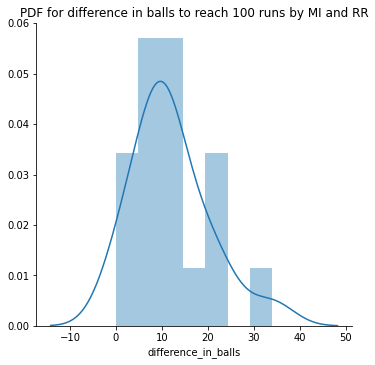

Median : 10.0


In [17]:
#Now plotting PDF 
import seaborn as sns
import matplotlib.pyplot as plt
sns.FacetGrid(df_MIvsRR,size=5) \
   .map(sns.distplot, "difference_in_balls") \
   .add_legend();

plt.title("PDF for difference in balls to reach 100 runs by MI and RR")
plt.show();

#Printing Median
print("Median :",df_MIvsRR['difference_in_balls'].median())

**Conclusion :-**



1.   By observing above PDF plot i can say most of the points are lies between 4 to 14 and median is 10.
2.   MI and RR played 20 head-head matches i.e total 40 innings. Out of 40 MI not scored 100 runs 2times and RR not scored 100 runs 1times.

By according to all the above analysis MI/RR will reach 100 runs in the diffrence of 10 balls more/less. In given options i am choosing (0-10) balls difference.



### Q5) Which bowler has the best Bolwer Letahlity Score(BLS) in today match?

In [70]:
#------------------------------- Bumrah ----------------------------
from functools import reduce
#Filtering out bumrah without wide deliveries. I know officially no-balls not comes under number of balls bowled by bowler
#But you can hardly get 0-1 no-ball for innings i.e why i am not removing no-balls from total balls bowled
#I am calculating BLS of player for every match then taking central tendency.
df = df_deliveries[(df_deliveries['bowler'] == 'JJ Bumrah')&(df_deliveries['wide_runs'] == 0)]
df_wickets = df[(df['player_dismissed'] != 'No Wicket') & (df['dismissal_kind'] != 'run out')]
df_dot_balls= df[(df['total_runs'] == 0)]
df_boundaries = df[(df['batsman_runs'] == 4) | (df['batsman_runs'] == 6)]

no_of_wickets = df_wickets.groupby('match_id')['player_dismissed'].count()
df_no_of_wickets = no_of_wickets.to_frame().reset_index()
no_of_dotballs = df_dot_balls_archer.groupby('match_id')['ball'].count()
df_no_of_dotballs = no_of_dotballs.to_frame().reset_index()
no_of_boundary_runs = df_boundaries_archer.groupby('match_id')['batsman_runs'].sum()
df_no_of_boundary_runs = no_of_boundary_runs.to_frame().reset_index()
no_of_boundaries = df_boundaries_archer.groupby('match_id')['batsman_runs'].count()
df_no_of_boundaries = no_of_boundaries.to_frame().reset_index()
no_of_balls_bowled = df_archer.groupby('match_id')['ball'].count()
df_no_of_balls_bowled = no_of_balls_bowled.to_frame().reset_index()


dfs = [df_no_of_wickets, df_no_of_dotballs, df_no_of_boundary_runs, df_no_of_boundaries, df_no_of_balls_bowled]
df_final = reduce(lambda left,right: pd.merge(left,right,on='match_id'), dfs)
df_final.rename(columns = {'player_dismissed':'Wickets_taken','ball_x':'dot_balls','batsman_runs_x':'boundary_runs',
                           'batsman_runs_y':'boundaries','ball_y':'balls_bowled'}, inplace = True)

#Adding small noise to denominator because we are getting infinity for some values
df_final['BLS_Bumrah'] = (df_final['Wickets_taken'] + (df_final['dot_balls'] * 2) - (df_final['boundary_runs'] / df_final['boundaries']))/(df_final['balls_bowled'] - (df_final['dot_balls'] * 2.5)+0.1)

print('Median of BLS Bumrah is:',df_final['BLS_Bumrah'].median())
df_final.head()

Median of BLS Bumrah is: 1.6153846153846154


,match_id,Wickets_taken,dot_balls,boundary_runs,boundaries,balls_bowled,BLS_Bumrah
0,7,1,7,18,4,26,1.235294
1,10,3,9,8,2,24,11.333333
2,22,1,8,12,3,25,2.600000
3,24,2,11,8,2,24,-5.714286
4,28,2,9,12,3,24,10.666667


Actually for some matches we are getting BLS is infinity. So that means denominatore is zero. So i am adding small noise to the denominator i.e 0.1.

In [86]:
#--------------------------------- Archer -----------------------------
df = df_deliveries[(df_deliveries['bowler'] == 'J Archer')&(df_deliveries['wide_runs'] == 0)]
df_wickets = df[(df['player_dismissed'] != 'No Wicket') & (df['dismissal_kind'] != 'run out')]
df_dot_balls= df[(df['total_runs'] == 0)]
df_boundaries = df[(df['batsman_runs'] == 4) | (df['batsman_runs'] == 6)]

no_of_wickets = df_wickets.groupby('match_id')['player_dismissed'].count()
df_no_of_wickets = no_of_wickets.to_frame().reset_index()
no_of_dotballs = df_dot_balls_archer.groupby('match_id')['ball'].count()
df_no_of_dotballs = no_of_dotballs.to_frame().reset_index()
no_of_boundary_runs = df_boundaries_archer.groupby('match_id')['batsman_runs'].sum()
df_no_of_boundary_runs = no_of_boundary_runs.to_frame().reset_index()
no_of_boundaries = df_boundaries_archer.groupby('match_id')['batsman_runs'].count()
df_no_of_boundaries = no_of_boundaries.to_frame().reset_index()
no_of_balls_bowled = df_archer.groupby('match_id')['ball'].count()
df_no_of_balls_bowled = no_of_balls_bowled.to_frame().reset_index()


dfs = [df_no_of_wickets, df_no_of_dotballs, df_no_of_boundary_runs, df_no_of_boundaries, df_no_of_balls_bowled]
df_final = reduce(lambda left,right: pd.merge(left,right,on='match_id'), dfs)
df_final.rename(columns = {'player_dismissed':'Wickets_taken','ball_x':'dot_balls','batsman_runs_x':'boundary_runs',
                           'batsman_runs_y':'boundaries','ball_y':'balls_bowled'}, inplace = True)

df_final['BLS_Archer'] = (df_final['Wickets_taken'] + (df_final['dot_balls'] * 2) - (df_final['boundary_runs'] / df_final['boundaries']))/(df_final['balls_bowled'] - (df_final['dot_balls'] * 2.5)+0.1)

print('Median of BLS Archer is:',df_final['BLS_Archer'].median())
df_final.head(2)

Median of BLS Archer is: 2.381720430107527


,match_id,Wickets_taken,dot_balls,boundary_runs,boundaries,balls_bowled,BLS_Archer
0,7914,3,10,12,3,25,190.000000
1,7940,2,6,22,5,18,3.096774


In [96]:
#--------------------------------- Trent Boult -----------------------------
dfb = df_deliveries[(df_deliveries['bowler'] == 'TA Boult')&(df_deliveries['wide_runs'] == 0)]
df_wickets = dfb[(dfb['player_dismissed'] != 'No Wicket') & (dfb['dismissal_kind'] != 'run out')]
df_dot_balls= dfb[(dfb['total_runs'] == 0)]
df_boundaries = dfb[(dfb['batsman_runs'] == 4) | (dfb['batsman_runs'] == 6)]

no_of_wickets = df_wickets.groupby('match_id')['player_dismissed'].count()
df_no_of_wickets = no_of_wickets.to_frame().reset_index()
no_of_dotballs = df_dot_balls_archer.groupby('match_id')['ball'].count()
df_no_of_dotballs = no_of_dotballs.to_frame().reset_index()
no_of_boundary_runs = df_boundaries_archer.groupby('match_id')['batsman_runs'].sum()
df_no_of_boundary_runs = no_of_boundary_runs.to_frame().reset_index()
no_of_boundaries = df_boundaries_archer.groupby('match_id')['batsman_runs'].count()
df_no_of_boundaries = no_of_boundaries.to_frame().reset_index()
no_of_balls_bowled = dfb.groupby('match_id')['ball'].count()
df_no_of_balls_bowled = no_of_balls_bowled.to_frame().reset_index()


dfs = [df_no_of_wickets, df_no_of_dotballs, df_no_of_boundary_runs, df_no_of_boundaries, df_no_of_balls_bowled]
df_final = reduce(lambda left,right: pd.merge(left,right,on='match_id'), dfs)
df_final.rename(columns = {'player_dismissed':'Wickets_taken','ball_x':'dot_balls','batsman_runs_x':'boundary_runs',
                           'batsman_runs_y':'boundaries','ball_y':'balls_bowled'}, inplace = True)

df_final['BLS_Boult'] = (df_final['Wickets_taken'] + (df_final['dot_balls'] * 2) - (df_final['boundary_runs'] / df_final['boundaries']))/(df_final['balls_bowled'] - (df_final['dot_balls'] * 2.5)+0.1)

print('Median of BLS Boult is:',df_final['BLS_Boult'].median())
df_final.head()

Median of BLS Boult is: 3.1707317073170733


,match_id,Wickets_taken,dot_balls,boundary_runs,boundaries,balls_bowled,BLS_Boult
0,7902,2,9,12,3,24,10.000000
1,7948,1,8,12,3,24,3.170732
2,11139,1,7,30,6,24,1.515152


In [89]:
#--------------------------------- Rahul Chahar -----------------------------
df = df_deliveries[(df_deliveries['bowler'] == 'RD Chahar')&(df_deliveries['wide_runs'] == 0)]
df_wickets = df[(df['player_dismissed'] != 'No Wicket') & (df['dismissal_kind'] != 'run out')]
df_dot_balls= df[(df['total_runs'] == 0)]
df_boundaries = df[(df['batsman_runs'] == 4) | (df['batsman_runs'] == 6)]

no_of_wickets = df_wickets.groupby('match_id')['player_dismissed'].count()
df_no_of_wickets = no_of_wickets.to_frame().reset_index()
no_of_dotballs = df_dot_balls_archer.groupby('match_id')['ball'].count()
df_no_of_dotballs = no_of_dotballs.to_frame().reset_index()
no_of_boundary_runs = df_boundaries_archer.groupby('match_id')['batsman_runs'].sum()
df_no_of_boundary_runs = no_of_boundary_runs.to_frame().reset_index()
no_of_boundaries = df_boundaries_archer.groupby('match_id')['batsman_runs'].count()
df_no_of_boundaries = no_of_boundaries.to_frame().reset_index()
no_of_balls_bowled = df_archer.groupby('match_id')['ball'].count()
df_no_of_balls_bowled = no_of_balls_bowled.to_frame().reset_index()


dfs = [df_no_of_wickets, df_no_of_dotballs, df_no_of_boundary_runs, df_no_of_boundaries, df_no_of_balls_bowled]
df_final = reduce(lambda left,right: pd.merge(left,right,on='match_id'), dfs)
df_final.rename(columns = {'player_dismissed':'Wickets_taken','ball_x':'dot_balls','batsman_runs_x':'boundary_runs',
                           'batsman_runs_y':'boundaries','ball_y':'balls_bowled'}, inplace = True)

df_final['BLS_Chahar'] = (df_final['Wickets_taken'] + (df_final['dot_balls'] * 2) - (df_final['boundary_runs'] / df_final['boundaries']))/(df_final['balls_bowled'] - (df_final['dot_balls'] * 2.5)+0.1)

print('Median of BLS Rahul Chahar is:',df_final['BLS_Chahar'].median())
df_final.head(2)

Median of BLS Rahul Chahar is: -3.1818181818181817


,match_id,Wickets_taken,dot_balls,boundary_runs,boundaries,balls_bowled,BLS_Chahar
0,11310,2,9,6,1,18,-3.181818
1,11318,1,11,12,3,24,-5.588235


In [91]:
#--------------------------------- Ben Stokes -----------------------------
df = df_deliveries[(df_deliveries['bowler'] == 'BA Stokes')&(df_deliveries['wide_runs'] == 0)]
df_wickets = df[(df['player_dismissed'] != 'No Wicket') & (df['dismissal_kind'] != 'run out')]
df_dot_balls= df[(df['total_runs'] == 0)]
df_boundaries = df[(df['batsman_runs'] == 4) | (df['batsman_runs'] == 6)]

no_of_wickets = df_wickets.groupby('match_id')['player_dismissed'].count()
df_no_of_wickets = no_of_wickets.to_frame().reset_index()
no_of_dotballs = df_dot_balls_archer.groupby('match_id')['ball'].count()
df_no_of_dotballs = no_of_dotballs.to_frame().reset_index()
no_of_boundary_runs = df_boundaries_archer.groupby('match_id')['batsman_runs'].sum()
df_no_of_boundary_runs = no_of_boundary_runs.to_frame().reset_index()
no_of_boundaries = df_boundaries_archer.groupby('match_id')['batsman_runs'].count()
df_no_of_boundaries = no_of_boundaries.to_frame().reset_index()
no_of_balls_bowled = df_archer.groupby('match_id')['ball'].count()
df_no_of_balls_bowled = no_of_balls_bowled.to_frame().reset_index()


dfs = [df_no_of_wickets, df_no_of_dotballs, df_no_of_boundary_runs, df_no_of_boundaries, df_no_of_balls_bowled]
df_final = reduce(lambda left,right: pd.merge(left,right,on='match_id'), dfs)
df_final.rename(columns = {'player_dismissed':'Wickets_taken','ball_x':'dot_balls','batsman_runs_x':'boundary_runs',
                           'batsman_runs_y':'boundaries','ball_y':'balls_bowled'}, inplace = True)

df_final['BLS_Stokes'] = (df_final['Wickets_taken'] + (df_final['dot_balls'] * 2) - (df_final['boundary_runs'] / df_final['boundaries']))/(df_final['balls_bowled'] - (df_final['dot_balls'] * 2.5)+0.1)

print('Median of BLS Ben Stokes is:',df_final['BLS_Stokes'].median())
df_final.head(2)

Median of BLS Ben Stokes is: 3.096774193548387


,match_id,Wickets_taken,dot_balls,boundary_runs,boundaries,balls_bowled,BLS_Stokes
0,2,1,6,12,3,24,0.989011
1,28,2,9,12,3,24,10.000000


**Conclusion :-**

According to above analysis Boult, Archer, Stokes has highest BLS. In given question Boult and Archer are in same option. So i am going with Archer or boult.